In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./dataset/zhihuyonghu.csv')

In [3]:
data.head()

,detail,followers,following,intro,name
0,NaN,"1,043,150",203,NaN,李开复
1,计算机软件Facebook人工智能研究所卡耐基梅隆大学机器人,"70,609",115,Facebook人工智能研究院研究员/研究经理，卡耐基梅隆大学机器人系博士,田渊栋
2,互联网24好玩产品经理北京邮电大学信息工程,231,273,产品经理，关注企业服务、AI、大数据。,易良慧
3,制药,4,58,NaN,huangjian
4,NaN,0,6,学生,流苏


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109381 entries, 0 to 109380
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   detail     43433 non-null   object
 1   followers  109381 non-null  object
 2   following  109381 non-null  object
 3   intro      80359 non-null   object
 4   name       109380 non-null  object
dtypes: object(5)
memory usage: 4.2+ MB


In [5]:
data.dropna(subset=['followers', 'following', 'name'])  # 子表中有一个nan该行就会被删除

,detail,followers,following,intro,name
0,NaN,"1,043,150",203,NaN,李开复
1,计算机软件Facebook人工智能研究所卡耐基梅隆大学机器人,"70,609",115,Facebook人工智能研究院研究员/研究经理，卡耐基梅隆大学机器人系博士,田渊栋
2,互联网24好玩产品经理北京邮电大学信息工程,231,273,产品经理，关注企业服务、AI、大数据。,易良慧
3,制药,4,58,NaN,huangjian
4,NaN,0,6,学生,流苏
...,...,...,...,...,...
109376,NaN,4,82,神经病,一诺
109377,电子商务苏州尚葡科技电子商务运营,30,50,Life is too short to drink bad wine.,沈钧
109378,电子商务,26,9,专业蜜蜡鉴定vx:kxm0755。,康小蜜
109379,NaN,0,1,什么也没有,王者农药不能玩


In [7]:
data = data.fillna('')  # nan值填充为空字符串

In [9]:
data['intro'] = data.intro + data.detail

In [10]:
del data['detail']

In [11]:
data

,followers,following,intro,name
0,"1,043,150",203,,李开复
1,"70,609",115,Facebook人工智能研究院研究员/研究经理，卡耐基梅隆大学机器人系博士计算机软件Face...,田渊栋
2,231,273,产品经理，关注企业服务、AI、大数据。互联网24好玩产品经理北京邮电大学信息工程,易良慧
3,4,58,制药,huangjian
4,0,6,学生,流苏
...,...,...,...,...
109376,4,82,神经病,一诺
109377,30,50,Life is too short to drink bad wine.电子商务苏州尚葡科技...,沈钧
109378,26,9,专业蜜蜡鉴定vx:kxm0755。电子商务,康小蜜
109379,0,1,什么也没有,王者农药不能玩


In [15]:
data_it = data[data.intro.str.contains('互联网|因特网|计算机')] # | 或

In [17]:
data_it

,followers,following,intro,name,is_edu
1,"70,609",115,Facebook人工智能研究院研究员/研究经理，卡耐基梅隆大学机器人系博士计算机软件Face...,田渊栋,False
2,231,273,产品经理，关注企业服务、AI、大数据。互联网24好玩产品经理北京邮电大学信息工程,易良慧,False
5,"7,563",153,FAIR炼丹中Facebook吃饭看paper玩游戏写码卡内基梅隆大学 (Carnegie ...,吴育昕,False
6,"6,183",211,The Journey is the Reward.互联网网易Brand Marketing,Kyle君,False
7,"1,902",49,小吴Facebook Applied Machine Learning程序员卡内基梅隆大学 ...,吴逸鸣,False
...,...,...,...,...,...
109244,614,78,互联网,木三刀,False
109256,1,4,cool互联网,Ella,False
109268,2,22,只是一个性向跟您不同的普通人。互联网IT 男氪金四核苑黄叫兽,黄某某,False
109281,108,0,夏普区域运营互联网,Zion.an,False


In [18]:
data_it['is_edu'] = data_it.intro.str.contains('教育')

C:\Users\luhe\AppData\Local\Temp\ipykernel_13396\2951315006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_it['is_edu'] = data_it.intro.str.contains('教育')


In [22]:
data_it.is_edu.sum()/len(data_it)

0.014510278113663845

In [23]:
data.head()

,followers,following,intro,name
0,"1,043,150",203,,李开复
1,"70,609",115,Facebook人工智能研究院研究员/研究经理，卡耐基梅隆大学机器人系博士计算机软件Face...,田渊栋
2,231,273,产品经理，关注企业服务、AI、大数据。互联网24好玩产品经理北京邮电大学信息工程,易良慧
3,4,58,制药,huangjian
4,0,6,学生,流苏


In [24]:
data_it = data[data.intro.str.contains('互联网|因特网|计算机|产品经理|软件')] 

In [25]:
data_it['job'] = 'internet'

C:\Users\luhe\AppData\Local\Temp\ipykernel_13396\2498431737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_it['job'] = 'internet'


In [26]:
data_mon = data[data.intro.str.contains('金融|银行|证券|基金')] 

In [27]:
data_mon['job'] = 'bank'

C:\Users\luhe\AppData\Local\Temp\ipykernel_13396\783163704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mon['job'] = 'bank'


In [28]:
data_edu = data[data.intro.str.contains('教育|培训|大学|学校|课程')] 

In [29]:
data_edu['job'] = 'edu'

C:\Users\luhe\AppData\Local\Temp\ipykernel_13396\172218367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edu['job'] = 'edu'


In [31]:
data_new = pd.concat([data_it, data_mon, data_edu])

In [32]:
data_new.describe()  # 非数值数据会自动计算count等

,followers,following,intro,name,job
count,32353,32353,32353,32353,32353
unique,5252,1564,25309,26587,3
top,0,0,互联网,[已重置],edu
freq,2388,1098,467,29,18938


In [33]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32353 entries, 1 to 109360
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   followers  32353 non-null  object
 1   following  32353 non-null  object
 2   intro      32353 non-null  object
 3   name       32353 non-null  object
 4   job        32353 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [35]:
del data_new['intro']

In [36]:
data_new

,followers,following,name,job
1,"70,609",115,田渊栋,internet
2,231,273,易良慧,internet
5,"7,563",153,吴育昕,internet
6,"6,183",211,Kyle君,internet
7,"1,902",49,吴逸鸣,internet
...,...,...,...,...
109349,173,49,吴炎平,edu
109350,"40,257",36,娜娜,edu
109351,0,9,蔡乐婷,edu
109353,24,34,张大狗,edu


In [37]:
data_new.job.value_counts()

edu         18938
internet    10312
bank         3103
Name: job, dtype: int64

In [40]:
(data_new.name.duplicated()).sum()  # name 列重复

5766

In [41]:
# 根据子表去重，子表相同才会删除
data_new.drop_duplicates(subset=['followers', 'following', 'name'], inplace=True)

In [43]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27739 entries, 1 to 109360
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   followers  27739 non-null  object
 1   following  27739 non-null  object
 2   name       27739 non-null  object
 3   job        27739 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [44]:
data_new.job.value_counts()

edu         14542
internet    10312
bank         2885
Name: job, dtype: int64

In [45]:
data_new

,followers,following,name,job
1,"70,609",115,田渊栋,internet
2,231,273,易良慧,internet
5,"7,563",153,吴育昕,internet
6,"6,183",211,Kyle君,internet
7,"1,902",49,吴逸鸣,internet
...,...,...,...,...
109345,1,7,没有故事的短暂一生,edu
109349,173,49,吴炎平,edu
109350,"40,257",36,娜娜,edu
109351,0,9,蔡乐婷,edu


In [50]:
data_new['followers'] = data_new.followers.str.replace(',', '').astype(np.int32)

In [52]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27739 entries, 1 to 109360
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   followers  27739 non-null  int32 
 1   following  27739 non-null  object
 2   name       27739 non-null  object
 3   job        27739 non-null  object
dtypes: int32(1), object(3)
memory usage: 975.2+ KB


In [54]:
data_new.groupby('job')['followers'].mean()

job
bank        2428.999653
edu         2634.539609
internet    3418.802948
Name: followers, dtype: float64

In [56]:
data_new['following'] = data_new.following.str.replace(',', '').astype(np.int32)

In [57]:
data_new.groupby('job')['following'].mean()

job
bank        188.935529
edu         154.789162
internet    190.196955
Name: following, dtype: float64

In [58]:
data_new.groupby('job')['following'].max()

job
bank         8568
edu         11949
internet     9909
Name: following, dtype: int32

In [59]:
data_new.groupby('job')['following'].describe()

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
bank,2885.0,188.935529,459.198038,0.0,13.0,54.0,163.0,8568.0
edu,14542.0,154.789162,405.841916,0.0,12.0,44.0,141.0,11949.0
internet,10312.0,190.196955,455.408214,0.0,16.0,57.0,170.0,9909.0


In [60]:
data_new.groupby('job').describe()

followers                                                    \
             count         mean           std  min  25%   50%    75%   
job                                                                    
bank        2885.0  2428.999653  12590.504328  0.0  4.0  40.0  446.0   
edu        14542.0  2634.539609  16239.737802  0.0  5.0  45.0  531.0   
internet   10312.0  3418.802948  21557.178588  0.0  7.0  70.0  766.0   

                   following                                                  \
               max     count        mean         std  min   25%   50%    75%   
job                                                                            
bank      311622.0    2885.0  188.935529  459.198038  0.0  13.0  54.0  163.0   
edu       614813.0   14542.0  154.789162  405.841916  0.0  12.0  44.0  141.0   
internet  823699.0   10312.0  190.196955  455.408214  0.0  16.0  57.0  170.0   

                   
              max  
job                
bank       8568.0  
edu       11949.0  
internet   9909.0

In [61]:
data_new

,followers,following,name,job
1,70609,115,田渊栋,internet
2,231,273,易良慧,internet
5,7563,153,吴育昕,internet
6,6183,211,Kyle君,internet
7,1902,49,吴逸鸣,internet
...,...,...,...,...
109345,1,7,没有故事的短暂一生,edu
109349,173,49,吴炎平,edu
109350,40257,36,娜娜,edu
109351,0,9,蔡乐婷,edu


In [62]:
data_new

,followers,following,name,job
1,70609,115,田渊栋,internet
2,231,273,易良慧,internet
5,7563,153,吴育昕,internet
6,6183,211,Kyle君,internet
7,1902,49,吴逸鸣,internet
...,...,...,...,...
109345,1,7,没有故事的短暂一生,edu
109349,173,49,吴炎平,edu
109350,40257,36,娜娜,edu
109351,0,9,蔡乐婷,edu


<Axes: >

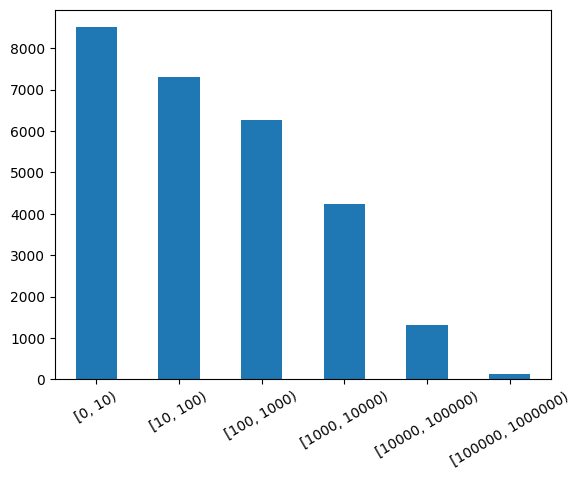

In [67]:
(pd.cut(data_new.followers, bins=[0,10,100,1000,10000,100000,1000000], right=False)).value_counts().plot.bar(rot=30)

In [68]:
g = pd.cut(data_new.followers, bins=[0,10,100,1000,10000,100000,1000000], right=False)

<Axes: ylabel='following'>

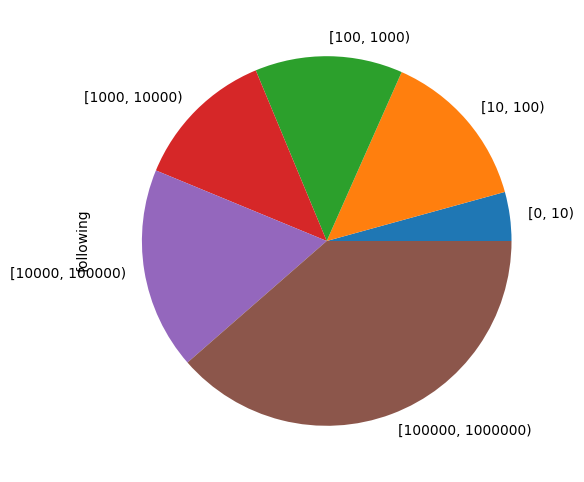

In [70]:
data_new.groupby(g)['following'].mean().plot.pie(figsize=(6,6))